<a href="https://colab.research.google.com/github/Marcin19721205/IntroductionToBigDataWSB/blob/main/Zadanie_Nr12_MJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import kagglehub

# Download latest version
path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

print("Path to dataset files:", path)

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("iabhishekofficial/mobile-price-classification")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'mobile-price-classification' dataset.
Path to dataset files: /kaggle/input/mobile-price-classification


In [2]:
import pandas as pd

# Wczytanie plików z katalogu sample_data
train = pd.read_csv("sample_data/train.csv")
test = pd.read_csv("sample_data/test.csv")

print("=== TRAIN — head ===")
print(train.head(), "\n")

print("=== TRAIN — info ===")
print(train.info(), "\n")

print("=== TRAIN — describe ===")
print(train.describe(), "\n")

print("=== TEST — head ===")
print(test.head(), "\n")

print("=== TEST — info ===")
print(test.info(), "\n")

print("=== TEST — describe ===")
print(test.describe(), "\n")


=== TRAIN — head ===
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch

In [3]:
import pandas as pd

# Wczytanie danych
train = pd.read_csv("sample_data/train.csv")
test = pd.read_csv("sample_data/test.csv")

#dane treningowe
X_train = train.drop("price_range", axis=1) #drop price range jako target
y_train = train["price_range"]

#dane testowe
# Uwaga: test ma kolumnę 'id', usuwamy ją z cech
X_test = test.drop("id", axis=1)

print("=== X_train (cechy treningowe) ===")
print(X_train.head(), "\n")

print("=== y_train (target) ===")
print(y_train.head(), "\n")

print("=== X_test (cechy testowe) ===")
print(X_test.head(), "\n")


=== X_train (cechy treningowe) ===
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_

In [4]:
#sprawdzam, czy sa puste
print("=== Braki danych w X_train (% udziału) ===")
print(X_train.isnull().sum() / len(X_train), "\n")

print("=== Braki danych w y_train (% udziału) ===")
print(y_train.isnull().sum() / len(y_train), "\n")

print("=== Braki danych w X_test (% udziału) ===")
print(X_test.isnull().sum() / len(X_test), "\n")


=== Braki danych w X_train (% udziału) ===
battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
dtype: float64 

=== Braki danych w y_train (% udziału) ===
0.0 

=== Braki danych w X_test (% udziału) ===
battery_power    0.0
blue             0.0
clock_speed      0.0
dual_sim         0.0
fc               0.0
four_g           0.0
int_memory       0.0
m_dep            0.0
mobile_wt        0.0
n_cores          0.0
pc               0.0
px_height        0.0
px_width         0.0
ram              0.0
sc_h             0.0
sc_w             0.0
talk_time        0.0
three_g          0.0
touch_screen     0.0
wifi             0.0
dtype: fl

Histogram zmiennej docelowej

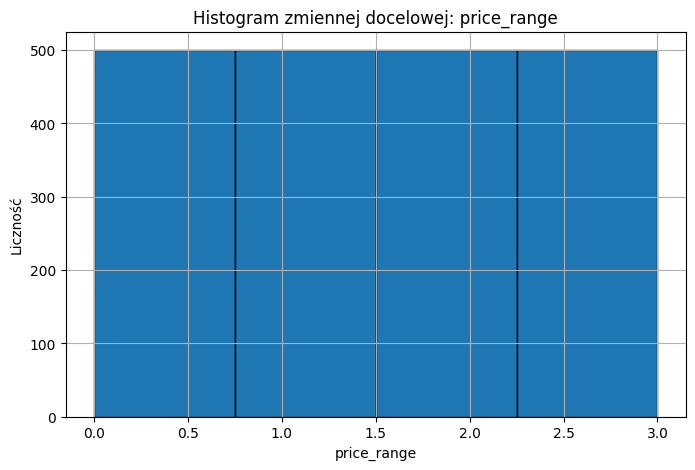

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# wczytanie z lokalnej struktury notebooka
train = pd.read_csv("sample_data/train.csv")

plt.figure(figsize=(8,5))
plt.hist(train["price_range"], bins=4, edgecolor="black")
plt.title("Histogram zmiennej docelowej: price_range")
plt.xlabel("price_range")
plt.ylabel("Liczność")
plt.grid(True)
plt.show()


Histogram idealnie zbalansowNY

#Buduję spójny dataset treningowy i testowy

In [6]:
import pandas as pd

# Wczytanie danych
train_raw = pd.read_csv("sample_data/train.csv")

# Ten dataset jest już numeryczny — nic nie kodujemy
dataset = train_raw.copy()

# Podział 80/20 metodą sample/drop
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset  = dataset.drop(train_dataset.index)

# Wynik
print(f"train_dataset length: {len(train_dataset)}")
print(f"test_dataset length:  {len(test_dataset)}\n")

print("=== train_dataset head ===")
print(train_dataset.head(), "\n")

print("=== test_dataset head ===")
print(test_dataset.head())


train_dataset length: 1600
test_dataset length:  400

=== train_dataset head ===
      battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
405            1454     1          0.5         1   1       0          34   
1190           1092     1          0.5         1  10       0          11   
1132           1524     1          1.8         1   0       0          10   
731            1807     1          2.1         0   2       0          49   
1754           1086     1          1.7         1   0       1          43   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
405     0.7         83        4  ...        250      1033  3419     7     5   
1190    0.5        167        3  ...        468       571   737    14     4   
1132    0.6        174        4  ...        154       550  2678    16     5   
731     0.8        125        1  ...        337      1384  1906    17    13   
1754    0.2        111        6  ...         56      1150  3285    

statystyki

In [7]:
import pandas as pd
import plotly.express as px

# Wczytanie pełnego datasetu
dataset = pd.read_csv("sample_data/train.csv")

# Podział 80/20
train_dataset = dataset.sample(frac=0.8, random_state=0)
test_dataset  = dataset.drop(train_dataset.index)

# --- Oddzielenie cech od zmiennej docelowej ---
train_labels = train_dataset.pop('price_range')
test_labels = test_dataset.pop('price_range')

# --- STATYSTYKI ---
print("=== STATYSTYKI train_dataset ===")
print(train_dataset.describe().T, "\n")

print("=== STATYSTYKI test_dataset ===")
print(test_dataset.describe().T, "\n")

# --- SCATTER MATRIX (jak w przykładzie) ---
fig = px.scatter_matrix(
    train_dataset,
    dimensions=['battery_power', 'ram', 'px_height', 'px_width'],
    color=train_labels, # Use train_labels for coloring
    height=800,
    width=800,
    title="Scatter matrix — cechy telefonu vs price_range"
)

fig.update_traces(diagonal_visible=False)  # czyści diagonalne histogramy
fig.show()

=== STATYSTYKI train_dataset ===
                count         mean          std    min       25%     50%  \
battery_power  1600.0  1236.876250   441.779643  501.0   843.000  1225.0   
blue           1600.0     0.497500     0.500150    0.0     0.000     0.0   
clock_speed    1600.0     1.516000     0.822065    0.5     0.675     1.5   
dual_sim       1600.0     0.511250     0.500030    0.0     0.000     1.0   
fc             1600.0     4.355625     4.401564    0.0     1.000     3.0   
four_g         1600.0     0.520625     0.499731    0.0     0.000     1.0   
int_memory     1600.0    32.024375    18.183211    2.0    16.000    32.0   
m_dep          1600.0     0.500688     0.288826    0.1     0.200     0.5   
mobile_wt      1600.0   140.238125    35.586854   80.0   109.000   139.0   
n_cores        1600.0     4.506250     2.291996    1.0     3.000     4.0   
pc             1600.0     9.885625     6.046933    0.0     4.750    10.0   
px_height      1600.0   653.662500   445.655324    0.0 

Buduję model sieci neuronowej

In [8]:
%tensorflow_version 2.x
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import gc #garbage collector - usuwa dane, co do których nie ma odniesien w kodzie
import tensorflow as tf
import sklearn.datasets as skds
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

np.set_printoptions(precision=12, suppress=True, linewidth=150)
pd.options.display.float_format = '{:.6f}'.format
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.19.0'

MODEL 1 — Baseline

In [15]:
def build_model_1(input_dim):
    model = Sequential()
    model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001), input_shape=[input_dim]))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(4, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


MODEL 2 — Z DROPOUTEM

In [16]:
from tensorflow.keras.layers import Dropout

def build_model_2(input_dim):
    model = Sequential()
    model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001), input_shape=[input_dim]))
    model.add(Dropout(0.3))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


MODEL 3 — Z Batch Normalization

In [17]:
from tensorflow.keras.layers import BatchNormalization

def build_model_3(input_dim):
    model = Sequential()
    model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001), input_shape=[input_dim]))
    model.add(BatchNormalization())

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())

    model.add(Dense(4, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


MODEL 4 — Dropout + BatchNorm (najbardziej efektywny)

In [18]:
def build_model_4(input_dim):
    model = Sequential()

    model.add(Dense(1024, activation='relu', kernel_regularizer=l2(0.001), input_shape=[input_dim]))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    model.add(Dense(128, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.2))

    model.add(Dense(4, activation='softmax'))

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model


Trening wszystkich modeli

In [20]:
input_dim = train_dataset.shape[1]

model1 = build_model_1(input_dim)
model2 = build_model_2(input_dim)
model3 = build_model_3(input_dim)
model4 = build_model_4(input_dim)

history1 = model1.fit(train_dataset, train_labels, validation_data=(test_dataset, test_labels), epochs=30, batch_size=32, verbose=1)
history2 = model2.fit(train_dataset, train_labels, validation_data=(test_dataset, test_labels), epochs=30, batch_size=32, verbose=1)
history3 = model3.fit(train_dataset, train_labels, validation_data=(test_dataset, test_labels), epochs=30, batch_size=32, verbose=1)
history4 = model4.fit(train_dataset, train_labels, validation_data=(test_dataset, test_labels), epochs=30, batch_size=32, verbose=1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



Epoch 1/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3761 - loss: 89.4784 - val_accuracy: 0.4600 - val_loss: 11.8425
Epoch 2/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4925 - loss: 9.1767 - val_accuracy: 0.4275 - val_loss: 9.2594
Epoch 3/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5284 - loss: 6.8776 - val_accuracy: 0.5075 - val_loss: 3.7677
Epoch 4/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.5172 - loss: 4.8002 - val_accuracy: 0.6025 - val_loss: 2.0410
Epoch 5/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5565 - loss: 3.7909 - val_accuracy: 0.5975 - val_loss: 1.6788
Epoch 6/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6192 - loss: 2.0222 - val_accuracy: 0.5200 - val_loss: 2.4853
Epoch 7/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6132 - loss: 1.9296 - val_accuracy: 0.6000 - val_loss: 1.7440
Epoch 8/30
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.6544 - loss: 1.3119 - val_accuracy: 0.6725 -

In [22]:
import plotly.graph_objects as go
import pandas as pd

def plot_compare(histories, labels):
    fig = go.Figure()

    for h, lbl in zip(histories, labels):
        hist = pd.DataFrame(h.history)
        fig.add_trace(go.Scatter(x=list(range(len(hist['accuracy']))), y=hist['accuracy'], mode='lines', name=f'{lbl} ACC'))
        fig.add_trace(go.Scatter(x=list(range(len(hist['val_accuracy']))), y=hist['val_accuracy'], mode='lines', name=f'{lbl} VAL_ACC'))

    fig.update_layout(title="Porównanie Accuracy modeli", width=1100, height=500)
    fig.show()

    fig2 = go.Figure()
    for h, lbl in zip(histories, labels):
        hist = pd.DataFrame(h.history)
        fig2.add_trace(go.Scatter(x=list(range(len(hist['loss']))), y=hist['loss'], mode='lines', name=f'{lbl} LOSS'))
        fig2.add_trace(go.Scatter(x=list(range(len(hist['val_loss']))), y=hist['val_loss'], mode='lines', name=f'{lbl} VAL_LOSS'))

    fig2.update_layout(title="Porównanie Loss modeli", width=1100, height=500, yaxis_type="log")
    fig2.show()

plot_compare(
    [history1, history2, history3, history4],
    ["Model1", "Model2_Dropout", "Model3_BN", "Model4_Dropout+BN"]
)

In [23]:
from sklearn.metrics import confusion_matrix
import numpy as np

preds = model4.predict(test_dataset)
pred_labels = preds.argmax(axis=1)

cm = confusion_matrix(test_labels, pred_labels)

fig = go.Figure(data=go.Heatmap(
    z=cm,
    x=["0","1","2","3"],
    y=["0","1","2","3"],
    colorscale='Blues'
))

fig.update_layout(title="Confusion Matrix (Model 4)", width=600, height=600)
fig.show()


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [24]:
from sklearn.metrics import classification_report

print(classification_report(test_labels, pred_labels))


              precision    recall  f1-score   support

           0       1.00      0.93      0.96        94
           1       0.91      0.93      0.92        98
           2       0.93      0.84      0.88       104
           3       0.87      1.00      0.93       104

    accuracy                           0.92       400
   macro avg       0.93      0.92      0.92       400
weighted avg       0.93      0.92      0.92       400

